In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

import pennylane as qml
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import sklearn.decomposition

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
tf.keras.backend.set_floatx('float64')

layer_1 = tf.keras.layers.Dense(2)
layer_2 = tf.keras.layers.Dense(2, activation="softmax")

model = tf.keras.Sequential([layer_1, layer_2])
model.compile(loss="mae")

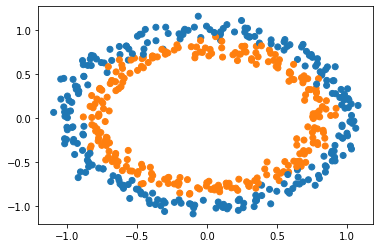

In [3]:
from sklearn.datasets import make_circles

np.random.seed(42)
tf.random.set_seed(42)

X, y = make_circles(n_samples=500, noise=0.05)
y_hot = tf.keras.utils.to_categorical(y, num_classes=2)  

c = ["#1f77b4" if y_ == 0 else "#ff7f0e" for y_ in y] 
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.show()

In [4]:
import pennylane as qml

n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(wires=i)) for i in range(2)]

In [5]:
n_layers = 1
weight_shapes = {"weights": (n_layers, n_qubits, 3)}
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(n_qubits,activation='relu',input_dim=2))
model.add(qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])

In [6]:
history = model.fit(X, y_hot, validation_data=(X, y_hot), epochs=30, batch_size=5)

Epoch 1/30
100/100 [==============================] - 44s 436ms/step - loss: 0.7340 - accuracy: 0.5290 - val_loss: 0.6911 - val_accuracy: 0.4980
Epoch 2/30
100/100 [==============================] - 44s 438ms/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6830 - val_accuracy: 0.6180
Epoch 3/30
100/100 [==============================] - 43s 435ms/step - loss: 0.6850 - accuracy: 0.5634 - val_loss: 0.6725 - val_accuracy: 0.6440
Epoch 4/30
100/100 [==============================] - 44s 439ms/step - loss: 0.6742 - accuracy: 0.5813 - val_loss: 0.6601 - val_accuracy: 0.5480
Epoch 5/30
100/100 [==============================] - 43s 435ms/step - loss: 0.6569 - accuracy: 0.6248 - val_loss: 0.6176 - val_accuracy: 0.7660
Epoch 6/30
100/100 [==============================] - 44s 439ms/step - loss: 0.6218 - accuracy: 0.6888 - val_loss: 0.5818 - val_accuracy: 0.7620
Epoch 7/30
100/100 [==============================] - 44s 437ms/step - loss: 0.6002 - accuracy: 0.7059 - val_loss: 0.5593 - val_ac

In [7]:
print(qnode.draw())

 0: ──RX(2.22)──Rot(1.57, -2.89, -0.768)──────────╭C──────────╭X──┤ ⟨Z⟩ 
 1: ──RX(0)─────Rot(4.63e-05, -2.82e-05, 0.0906)──╰X──╭C──────│───┤ ⟨Z⟩ 
 2: ──RX(0.18)──Rot(0.000326, 0.000411, 0.698)────────╰X──╭C──│───┤ ⟨Z⟩ 
 3: ──RX(0)─────Rot(-1.68e-08, 5.1e-09, -0.825)───────────╰X──╰C──┤ ⟨Z⟩ 



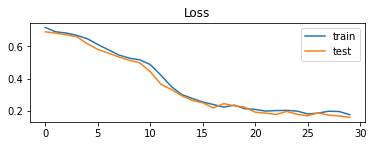

In [8]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

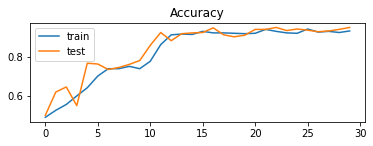

In [9]:
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

In [10]:
predy = model.predict(X)
predy

array([[7.41223250e-02, 9.25877675e-01],
       [8.80686470e-01, 1.19313530e-01],
       [8.12432779e-03, 9.91875672e-01],
       [9.36783464e-01, 6.32165364e-02],
       [9.84005173e-01, 1.59948273e-02],
       [4.21969679e-02, 9.57803032e-01],
       [9.32484615e-03, 9.90675154e-01],
       [7.35604326e-01, 2.64395674e-01],
       [7.23290028e-01, 2.76709972e-01],
       [1.06926152e-01, 8.93073848e-01],
       [8.79140051e-01, 1.20859949e-01],
       [9.91788053e-01, 8.21194659e-03],
       [3.90939628e-02, 9.60906037e-01],
       [9.78512366e-01, 2.14876338e-02],
       [1.12318266e-03, 9.98876817e-01],
       [1.51781307e-02, 9.84821869e-01],
       [9.55399921e-03, 9.90446001e-01],
       [9.66356188e-01, 3.36438118e-02],
       [7.17528231e-04, 9.99282472e-01],
       [5.21695018e-03, 9.94783050e-01],
       [7.39413306e-03, 9.92605867e-01],
       [3.96608463e-02, 9.60339154e-01],
       [2.43672932e-02, 9.75632707e-01],
       [4.17586104e-02, 9.58241390e-01],
       [7.918717

In [12]:
rounded_labels_pred=np.argmax(predy, axis=1)
rounded_labels_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [13]:
rounded_labels_real = np.argmax(y_hot , axis=1)
rounded_labels_real

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

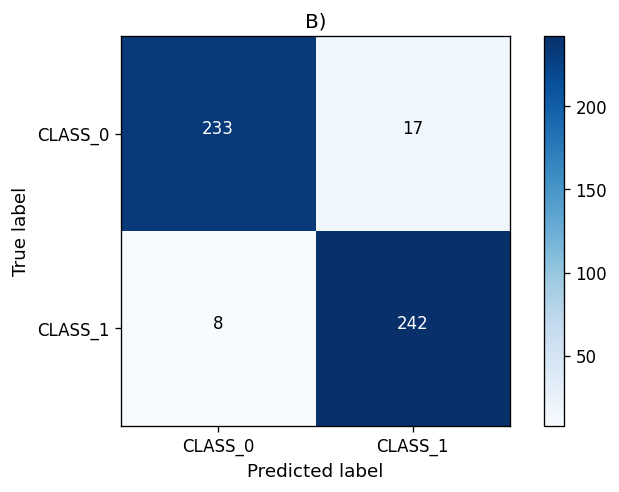

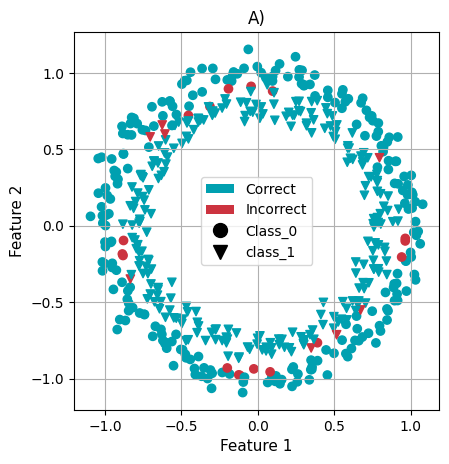

In [21]:
fig = plot_points_prediction(X, rounded_labels_real, rounded_labels_pred)